In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
match_events= pd.read_csv('/content/match_events.csv')

In [13]:
match_events.head()

,matchid,hometeamname,awayteamname,event,minute,phase,injuryminute,teamfromid,teamtoid,playerfromid,playertoid,time,matcheventattribute
0,2024442,Austria,North Macedonia,StartFirstHalf,0,1,0,NaN,NaN,NaN,NaN,2021-06-13T16:00:20.217,NaN
1,2024442,Austria,North Macedonia,Foul,4,1,0,59205.0,8.0,250039878.0,250003976.0,2021-06-13T16:03:45.897,NaN
2,2024442,Austria,North Macedonia,FreeKick,4,1,0,8.0,NaN,1909713.0,NaN,2021-06-13T16:03:56.853,NaN
3,2024442,Austria,North Macedonia,Foul,5,1,0,59205.0,8.0,250004363.0,101177.0,2021-06-13T16:04:44.217,NaN
4,2024442,Austria,North Macedonia,FreeKick,5,1,0,8.0,NaN,250065408.0,NaN,2021-06-13T16:04:54.533,NaN


In [14]:
match_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6136 entries, 0 to 6135
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   matchid              6136 non-null   int64  
 1   hometeamname         6136 non-null   object 
 2   awayteamname         6136 non-null   object 
 3   event                6136 non-null   object 
 4   minute               6136 non-null   int64  
 5   phase                6136 non-null   int64  
 6   injuryminute         6136 non-null   int64  
 7   teamfromid           5797 non-null   float64
 8   teamtoid             1603 non-null   float64
 9   playerfromid         5791 non-null   float64
 10  playertoid           1592 non-null   float64
 11  time                 6136 non-null   object 
 12  matcheventattribute  93 non-null     object 
dtypes: float64(4), int64(4), object(5)
memory usage: 623.3+ KB


In [15]:
match_events.columns.tolist()

['matchid',
 'hometeamname',
 'awayteamname',
 'event',
 'minute',
 'phase',
 'injuryminute',
 'teamfromid',
 'teamtoid',
 'playerfromid',
 'playertoid',
 'time',
 'matcheventattribute']

In [16]:
match_events.isnull().sum()

matchid                   0
hometeamname              0
awayteamname              0
event                     0
minute                    0
phase                     0
injuryminute              0
teamfromid              339
teamtoid               4533
playerfromid            345
playertoid             4544
time                      0
matcheventattribute    6043
dtype: int64

In [17]:
match_events.shape

(6136, 13)

In [18]:
match_events.isna().sum()

matchid                   0
hometeamname              0
awayteamname              0
event                     0
minute                    0
phase                     0
injuryminute              0
teamfromid              339
teamtoid               4533
playerfromid            345
playertoid             4544
time                      0
matcheventattribute    6043
dtype: int64

In [19]:
match_events.duplicated

<bound method DataFrame.duplicated of       matchid hometeamname     awayteamname           event  minute  phase  \
0     2024442      Austria  North Macedonia  StartFirstHalf       0      1   
1     2024442      Austria  North Macedonia            Foul       4      1   
2     2024442      Austria  North Macedonia        FreeKick       4      1   
3     2024442      Austria  North Macedonia            Foul       5      1   
4     2024442      Austria  North Macedonia        FreeKick       5      1   
...       ...          ...              ...             ...     ...    ...   
6131  2024448        Wales      Switzerland         Offside      90      2   
6132  2024448        Wales      Switzerland    Substitution      90      2   
6133  2024448        Wales      Switzerland        FreeKick      90      2   
6134  2024448        Wales      Switzerland          Corner      90      2   
6135  2024448        Wales      Switzerland   EndSecondHalf      90      2   

      injuryminute  teamfromid  teamtoid  playerfromid   playertoid  \
0                0         NaN       NaN           NaN          NaN   
1                0     59205.0       8.0   250039878.0  250003976.0   
2                0         8.0       NaN     1909713.0          NaN   
3                0     59205.0       8.0   250004363.0     101177.0   
4                0         8.0       NaN   250065408.0          NaN   
...            ...         ...       ...           ...          ...   
6131             2       128.0       NaN      102130.0          NaN   
6132             3       144.0     144.0      103769.0  250097090.0   
6133             3       144.0       NaN   250012939.0          NaN   
6134             4       128.0       NaN   250011089.0          NaN   
6135             6         NaN       NaN           NaN          NaN   

                         time matcheventattribute  
0     2021-06-13T16:00:20.217                 NaN  
1     2021-06-13T16:03:45.897                 NaN  
2     2021-06-13T16:03:56.853                 NaN  
3     2021-06-13T16:04:44.217                 NaN  
4     2021-06-13T16:04:54.533                 NaN  
...                       ...                 ...  
6131  2021-06-12T14:51:27.037                 NaN  
6132   2021-06-12T14:52:17.27                 NaN  
6133   2021-06-12T14:52:45.17                 NaN  
6134  2021-06-12T14:53:47.597                 NaN  
6135  2021-06-12T14:55:26.753                 NaN  

[6136 rows x 13 columns]>

In [20]:
match_events.describe()

,matchid,minute,phase,injuryminute,teamfromid,teamtoid,playerfromid,playertoid
count,6.136000e+03,6136.000000,6136.000000,6136.000000,5797.000000,1603.000000,5.791000e+03,1.592000e+03
mean,2.024467e+06,54.187256,1.720339,0.285854,11963.191306,11741.525265,1.931857e+08,2.060241e+08
std,1.484099e+01,29.903615,0.750344,1.067151,23378.321867,23230.217972,1.044015e+08,9.495472e+07
min,2.024441e+06,0.000000,1.000000,0.000000,8.000000,8.000000,5.214800e+04,5.214800e+04
25%,2.024455e+06,30.000000,1.000000,0.000000,43.000000,43.000000,2.500009e+08,2.500111e+08
50%,2.024468e+06,54.000000,2.000000,0.000000,110.000000,110.000000,2.500260e+08,2.500499e+08
75%,2.024481e+06,79.000000,2.000000,0.000000,135.000000,135.000000,2.500666e+08,2.500766e+08
max,2.024491e+06,120.000000,5.000000,10.000000,59205.000000,59205.000000,2.501551e+08,2.501551e+08


In [21]:
match_events.nunique()

matchid                  51
hometeamname             24
awayteamname             24
event                    38
minute                  121
phase                     5
injuryminute             11
teamfromid               24
teamtoid                 24
playerfromid            451
playertoid              444
time                   6132
matcheventattribute      31
dtype: int64

In [22]:
numeric_columns = match_events.select_dtypes(include=['number']).columns
categorical_columns = match_events.select_dtypes(include=['object']).columns

match_events[numeric_columns] = match_events[numeric_columns].fillna(match_events[numeric_columns].mean())
match_events[categorical_columns]=match_events[categorical_columns].fillna(match_events[categorical_columns].mode())

In [23]:
match_events.isnull().sum()

matchid                   0
hometeamname              0
awayteamname              0
event                     0
minute                    0
phase                     0
injuryminute              0
teamfromid                0
teamtoid                  0
playerfromid              0
playertoid                0
time                      0
matcheventattribute    6042
dtype: int64

In [24]:
match_events.isna().sum()

matchid                   0
hometeamname              0
awayteamname              0
event                     0
minute                    0
phase                     0
injuryminute              0
teamfromid                0
teamtoid                  0
playerfromid              0
playertoid                0
time                      0
matcheventattribute    6042
dtype: int64

In [25]:
match_events = match_events.drop(['matcheventattribute'],axis=1)

In [27]:
match_events.isna().sum()

matchid         0
hometeamname    0
awayteamname    0
event           0
minute          0
phase           0
injuryminute    0
teamfromid      0
teamtoid        0
playerfromid    0
playertoid      0
time            0
dtype: int64

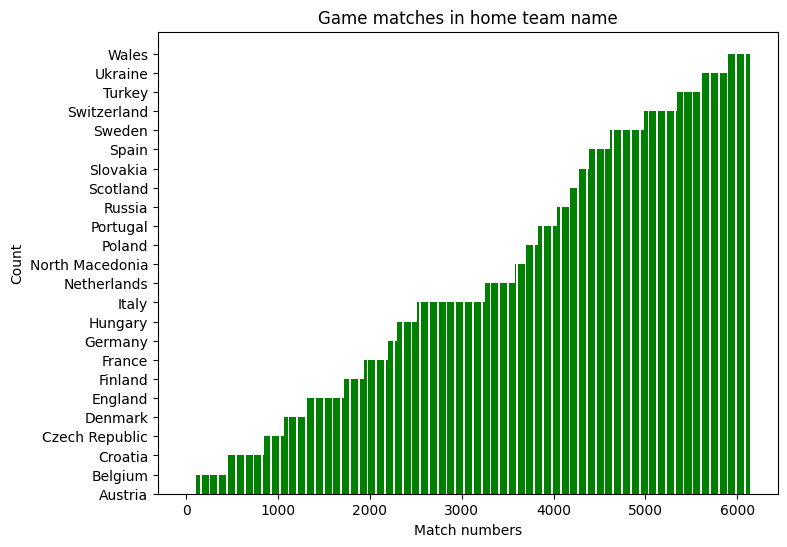

In [28]:
# Assuming 'match events' is your DataFrame
home_team_counts = match_events['hometeamname']
plt.figure(figsize=(8, 6))
plt.bar(home_team_counts.index,home_team_counts, color='green')
plt.title('Game matches in home team name')
plt.xlabel('Match numbers')
plt.ylabel('Count')
plt.show()

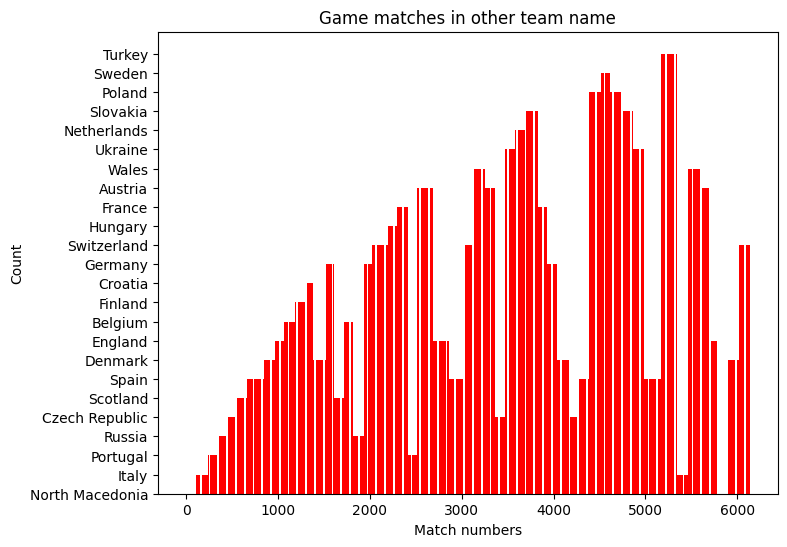

In [29]:
# Assuming 'match events' is your DataFrame
other_team_counts = match_events['awayteamname']
plt.figure(figsize=(8, 6))
plt.bar(other_team_counts.index,other_team_counts, color='red')
plt.title('Game matches in other team name')
plt.xlabel('Match numbers')
plt.ylabel('Count')
plt.show()

<ipython-input-30-8f1b59251e39>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=injury_per_minute.index, y=injury_per_minute.values, palette='viridis')


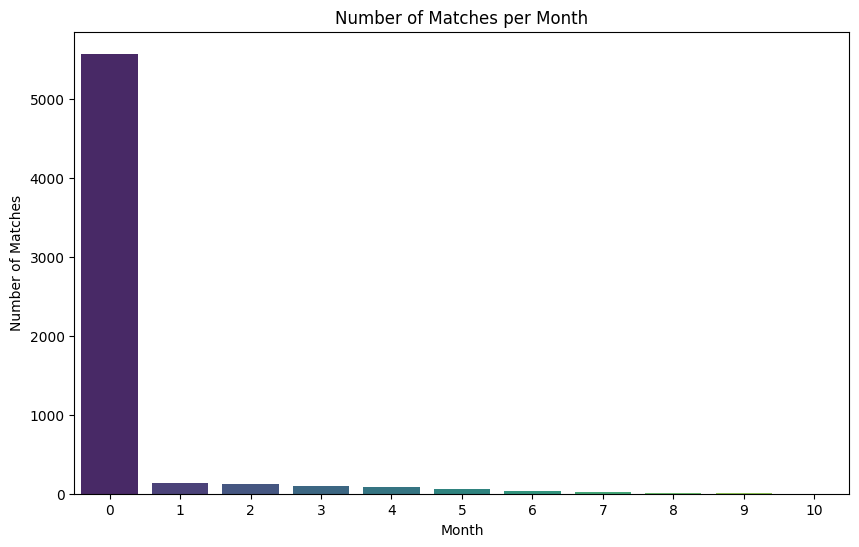

In [30]:
injury_per_minute = match_events['injuryminute'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=injury_per_minute.index, y=injury_per_minute.values, palette='viridis')
plt.title('Number of Matches per Month')
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.show()

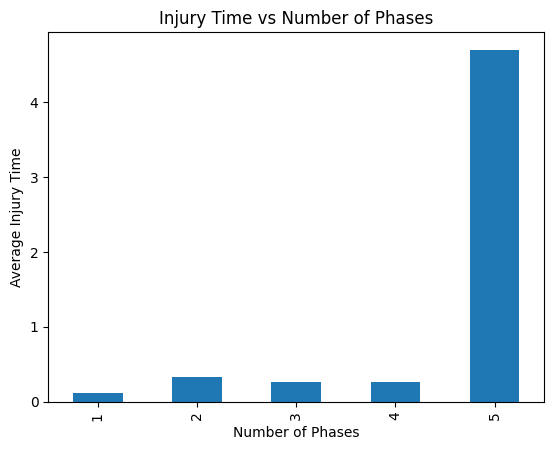

In [31]:
import matplotlib.pyplot as plt

avg_injury_minute = match_events.groupby('phase')['injuryminute'].mean()

avg_injury_minute.plot(kind='bar')
plt.xlabel('Number of Phases')
plt.ylabel('Average Injury Time')
_ = plt.title('Injury Time vs Number of Phases')

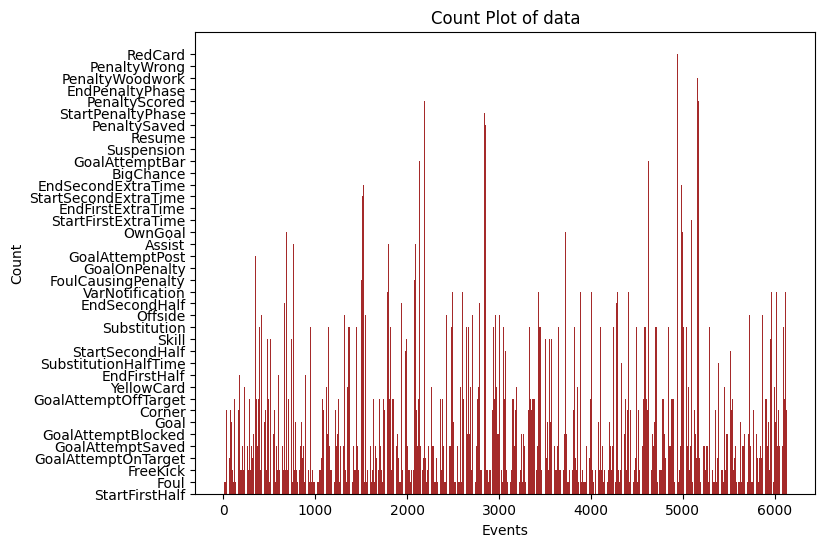

In [32]:
data = match_events['event']
# Using Matplotlib to create a count plot
plt.figure(figsize=(8, 6))
plt.bar(data.index, data, color='brown')
plt.title('Count Plot of data')
plt.xlabel('Events')
plt.ylabel('Count')
plt.show()

In [36]:
print('Maximum phase')
match_events[['hometeamname','awayteamname','phase','event']].max()

Maximum phase


hometeamname         Wales
awayteamname         Wales
phase                    5
event           YellowCard
dtype: object

In [37]:
print('Minimum phase')
match_events[['hometeamname','awayteamname','phase','event']].min()

Minimum phase


hometeamname    Austria
awayteamname    Austria
phase                 1
event            Assist
dtype: object

In [38]:
print('the mode of the events')
match_events[['hometeamname','awayteamname','phase','event']].mode()

the mode of the events


,hometeamname,awayteamname,phase,event
0,Italy,Spain,2,FreeKick


In [39]:
print('match_events maximum numerics')
match_events[['minute','phase','injuryminute','teamfromid','teamtoid','playerfromid','playertoid']].max()

match_events maximum numerics


minute                120.0
phase                   5.0
injuryminute           10.0
teamfromid          59205.0
teamtoid            59205.0
playerfromid    250155055.0
playertoid      250155055.0
dtype: float64

In [40]:
print('match_events minimum numerics')
match_events[['minute','phase','injuryminute','teamfromid','teamtoid','playerfromid','playertoid']].min()

match_events minimum numerics


minute              0.0
phase               1.0
injuryminute        0.0
teamfromid          8.0
teamtoid            8.0
playerfromid    52148.0
playertoid      52148.0
dtype: float64

In [41]:
print('match_events mean numerics')
match_events[['minute','phase','injuryminute','teamfromid','teamtoid','playerfromid','playertoid']].mean()

match_events mean numerics


minute          5.418726e+01
phase           1.720339e+00
injuryminute    2.858540e-01
teamfromid      1.196319e+04
teamtoid        1.174153e+04
playerfromid    1.931857e+08
playertoid      2.060241e+08
dtype: float64

In [42]:
data = match_events[['minute','phase','injuryminute','teamfromid','teamtoid','playerfromid','playertoid']]

In [43]:
data = data.dropna(how='any',axis=0)

In [44]:
data

,minute,phase,injuryminute,teamfromid,teamtoid,playerfromid,playertoid
0,0,1,0,11963.191306,11741.525265,1.931857e+08,206024112.0
1,4,1,0,59205.000000,8.000000,2.500399e+08,250003976.0
2,4,1,0,8.000000,11741.525265,1.909713e+06,206024112.0
3,5,1,0,59205.000000,8.000000,2.500044e+08,101177.0
4,5,1,0,8.000000,11741.525265,2.500654e+08,206024112.0
...,...,...,...,...,...,...,...
6131,90,2,2,128.000000,11741.525265,1.021300e+05,206024112.0
6132,90,2,3,144.000000,144.000000,1.037690e+05,250097090.0
6133,90,2,3,144.000000,11741.525265,2.500129e+08,206024112.0
6134,90,2,4,128.000000,11741.525265,2.500111e+08,206024112.0


In [45]:
from sklearn.cluster import KMeans
clusters = 5

kmeans = KMeans(n_clusters = clusters)
kmeans.fit(data)

print(kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 0 1 ... 3 3 3]


In [46]:
from sklearn.decomposition import PCA

pca = PCA(3)
pca.fit(data)

pca_data = pd.DataFrame(pca.transform(data))

print(pca_data.head())

              0             1             2
0  7.407117e-07  1.293229e-06      0.001967
1 -5.682170e+07 -4.402184e+07  46100.533414
2  1.912759e+08  1.412483e+05 -11487.250459
3 -5.697073e+07  2.058809e+08  44143.892471
4 -5.687971e+07 -4.200313e+04 -12020.974937


<Axes: >

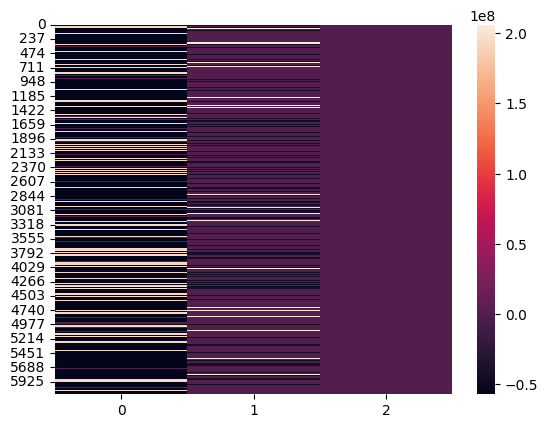

In [47]:
sns.heatmap(pca_data)

<Axes: >

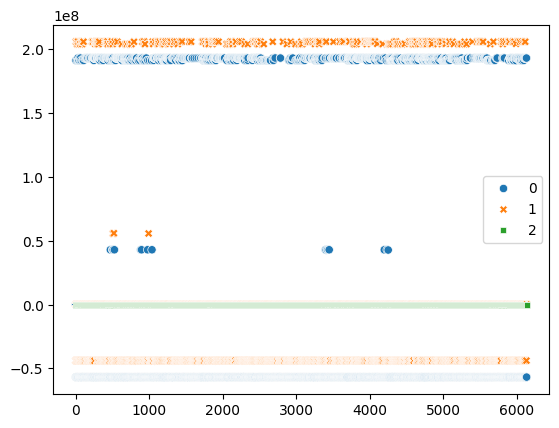

In [48]:
sns.scatterplot(pca_data)

<Axes: >

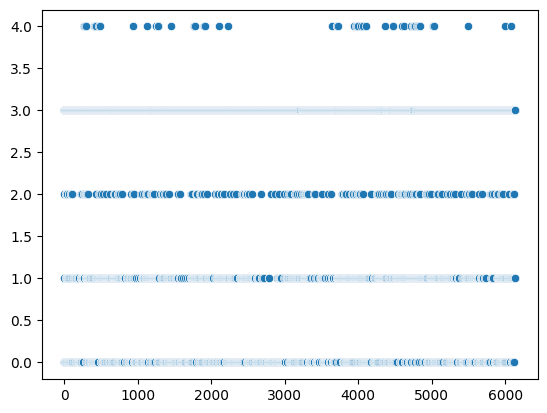

In [49]:
sns.scatterplot(kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


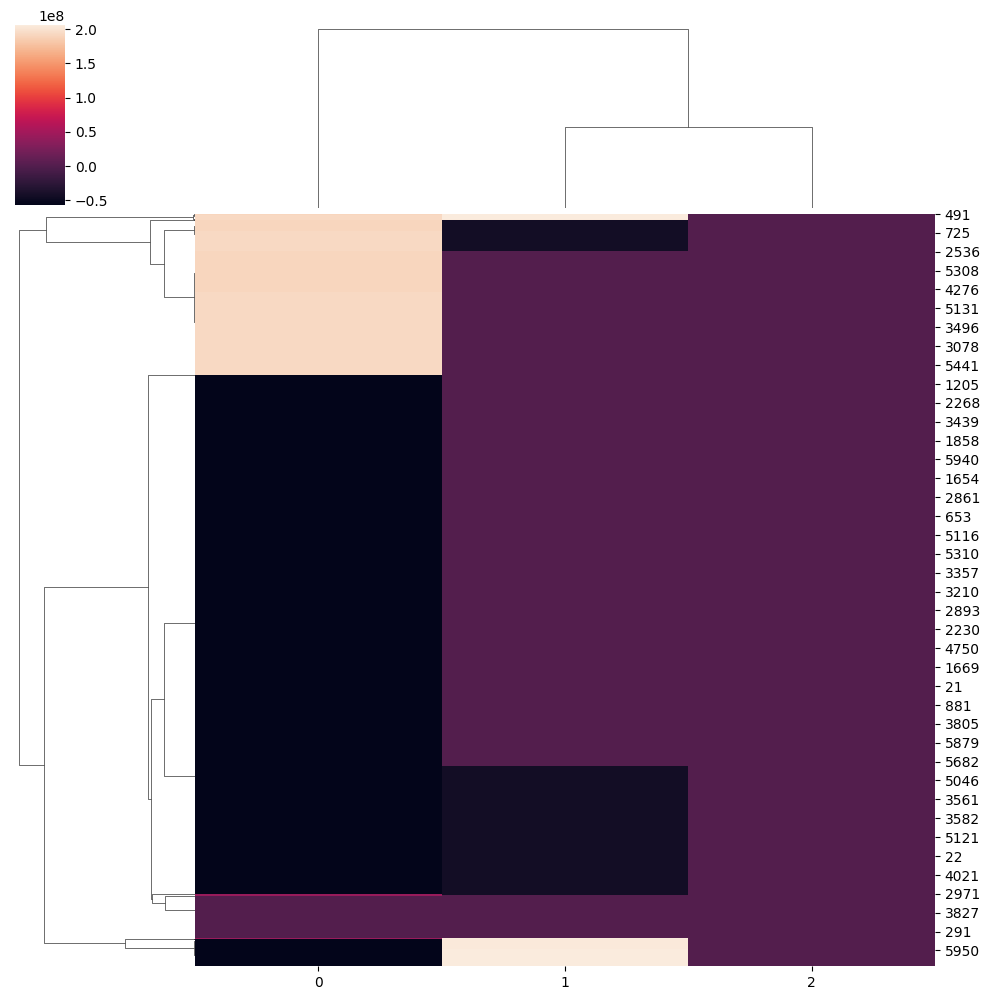

In [50]:
sns.clustermap(pca_data)

<Axes: ylabel='Density'>

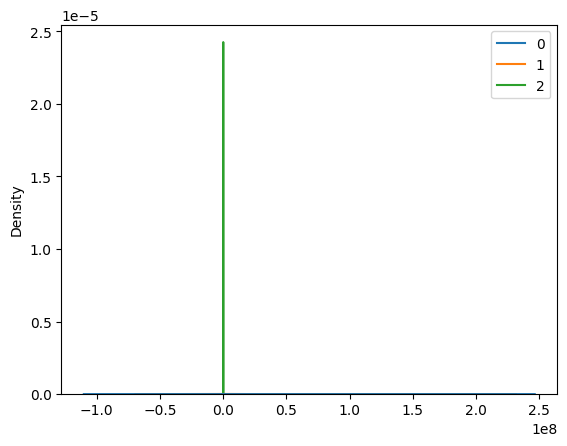

In [51]:
sns.kdeplot(data=pca_data)

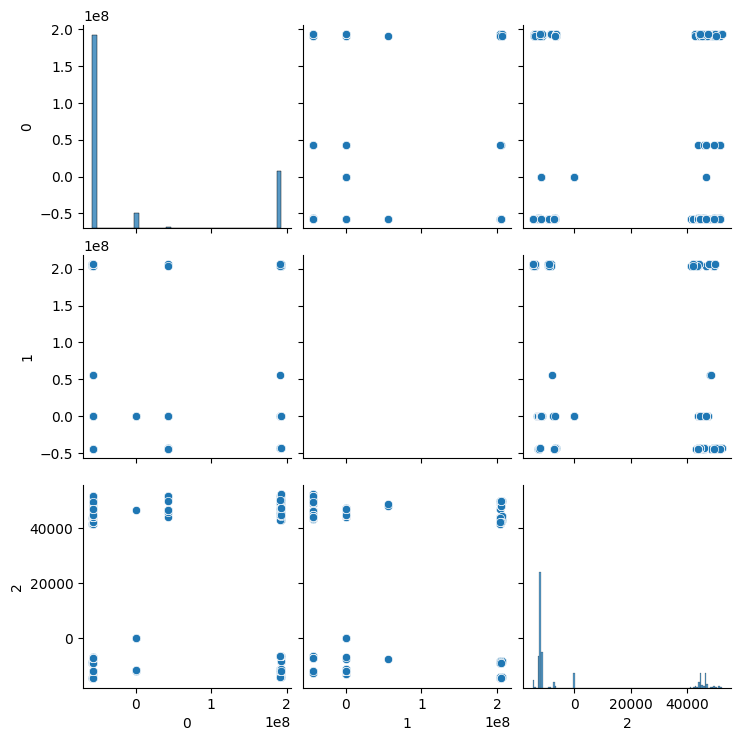

In [52]:
sns.pairplot(data=pca_data)

<Axes: ylabel='Density'>

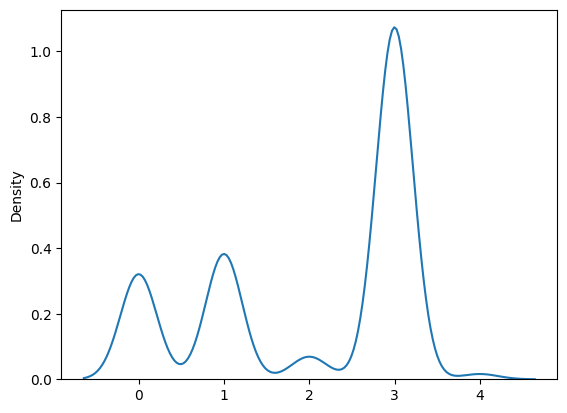

In [53]:
sns.kdeplot(data=kmeans.labels_)

In [54]:
data.to_csv('Cleaned_match_events.csv')

As we can see in EDA done on datasets:

Max injuryminute time is 12.0.

Min injuryminute is 0

Mean injuryminute is 2.858540e-01

On the other hand the phase has been is on the match done:

Max phase is 5

Minimum phase is 1

And the mode phase is 2

On the other hand the event has been is on the match done:

Max phase is YellowCard

Minimum phase is Assist

And the mode phase is freeKick

On the other hand the hometeamname with awayteamname has been is on the match done:

Max hometeamname is Wales and awayteamname is Wales

Minimum hometeamname is Austria and awayteamname is Austria

Mode hometeamname  is Italy and the awayteamname is Spain